# <b> House Prices - Cost Function and Gradient Descent with Python (Multiple Variables)
    
<b> Based on Andrews Ng course from Coursera


In [1]:
# Imports
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel

In [2]:
# Normalization
def feature_normalize(X):
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s
        
        return X_norm, mean_r, std_r

In [3]:
# Computing the Cost 
def compute_cost(X, y, theta):

    m = y.size
    predictions = X.dot(theta)
    sqErrors = (predictions - y)
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors) ** 2

    return J

In [4]:
# Computing the Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):
        predictions = X.dot(theta)
        theta_size = theta.size
        for it in range(theta_size):
            temp = X[:, it]
            temp.shape = (m, 1)
            errors_x1 = (predictions - y) * temp
            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()
        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [5]:
#Load the dataset
data = loadtxt('ex1data2.txt', delimiter=',')


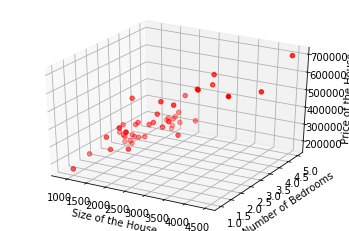

In [9]:
#Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('Size of the House')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of the House')
plt.show()


In [11]:
# Separating the data from the variable we want to predict
X = data[:, :2]
y = data[:, 2]

In [12]:
# number of training samples
m = y.size
y.shape = (m, 1)

In [13]:
# Normalizing the data
x, mean_r, std_r = feature_normalize(X)

In [15]:
# Add a column of ones to X 
it = ones(shape=(m, 3))
it[:, 1:3] = x

In [16]:
# Values for iteractions and value
iterations = 400
alpha = 0.01

In [18]:
# Values for theta
theta = zeros(shape=(3, 1))

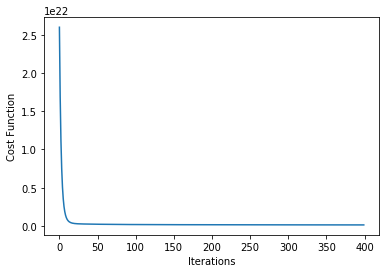

In [19]:
# Calling Gradient Descent 
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
plot(arange(iterations), J_history/10)
xlabel('Iterations')
ylabel('Cost Function')
show()
